<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scratch SVM code

In [ ]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        if self.verbose:
            Output the learning process when #verbose is set to True
            print()
        pass

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """

        pass
        return

# Assingment

# Problem 1 Lagrange’s steepest descent by the undetermined multiplier method

Lagrange’s undetermined multiplier method is used for SVM learning. Prepare Lagrange multiplier $\lambda$ for the number of samples and update it by the following formula. Implement the method that performs this calculation in the ScratchSVMClassifier class.

In [ ]:
def _linear_kernel(self, xi, xj):
    return np.dot(xi, xj)


In [ ]:
def _update_lambdas(self, X, y):
    n_samples = X.shape[0]
    for i in range(n_samples):
        sum_term = 0
        for j in range(n_samples):
            sum_term += self.lambdas[j] * y[i] * y[j] * self._linear_kernel(X[i], X[j])

        self.lambdas[i] += self.alpha * (1 - sum_term)

        #Enforce constraint: lambda_i >= 0
        if self.lambdas[i] < 0:
            self.lambdas[i] = 0


In [ ]:
def __init__(self, num_iter=100, alpha=0.01, verbose=True):
    self.num_iter = num_iter
    self.alpha = alpha
    self.verbose = verbose


In [ ]:
def fit(self, X, y):
    n_samples = X.shape[0]
    self.lambdas = np.zeros(n_samples)

    for it in range(self.num_iter):
        self._update_lambdas(X, y)

        if self.verbose:
            print(f"Iteration {it+1}: Lambdas = {self.lambdas[:5]} ...")


# Problem 2 Support vector determination

A sample whose calculated Lagrange multiplier $ \ lambda $ is larger than the Settings threshold is treated as a support vector. You will need a support vector when estimating. Write the code to determine the support vector and keep it as an instance variable.




In [ ]:
def fit(self, X, y, X_val=None, y_val=None):
    n_samples = X.shape[0]
    self.lambdas = np.zeros(n_samples)

    for it in range(self.num_iter):
        self._update_lambdas(X, y)

        if self.verbose:
            print(f"Iteration {it+1}: Lambdas = {self.lambdas[:5]} ...")

    #Storing original training data for support vector selection
    self.X = X
    self.y = y.reshape(-1, 1)

    #After training is complete
    support_vector_indices = np.where(self.lam > self.threshold)[0]
    self.index_support_vectors = support_vector_indices
    self.X_sv = self.X[support_vector_indices]
    self.y_sv = self.y[support_vector_indices]
    self.lam_sv = self.lam[support_vector_indices]
    self.n_support_vectors = len(support_vector_indices)

    if self.verbose:
        print(f"Number of support vectors: {self.n_support_vectors}")


# Problem 3 Estimated

At the time of estimation, the features of the data to be estimated and the features of the support vector are calculated using a kernel function. The sign of $f(x)$ obtained is the classification result.




In [ ]:
def _kernel_function(self, x1, x2):
    if self.kernel == 'linear':
        return np.dot(x1, x2)
    elif self.kernel == 'polynomial':
        degree = 2
        return (np.dot(x1, x2) + 1) ** degree
    else:
        raise ValueError("Unsupported kernel")


In [ ]:
def predict(self, X):
    """
    Estimate the label using the SVM classifier.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input data

    Returns
    -------
    ndarray, shape (n_samples, 1)
        Estimated class labels (+1 or -1)
    """


    y_pred = np.zeros((X.shape[0], 1))

    for i, x in enumerate(X):
        total = 0
        for lam, y_sv, x_sv in zip(self.lam_sv, self.y_sv, self.X_sv):
            total += lam * y_sv * self._kernel_function(x, x_sv)
        y_pred[i] = np.sign(total)

    return y_pred


# Compiled Code

In [40]:
import numpy as np

class ScratchSVMClassifier:
    """
    Scratch implementation of a binary SVM classifier using the dual formulation.

    Parameters
    ----------
    num_iter : int
        Number of training iterations
    lr : float
        Learning rate for dual variable updates
    kernel : str
        Kernel type: 'linear' or 'polynomial'
    threshold : float
        Threshold to identify support vectors
    verbose : bool
        If True, prints training info

    Attributes
    ----------
    self.b : float
        Bias term
    self.lambdas : ndarray
        Lagrange multipliers
    self.X_sv, self.y_sv : ndarray
        Support vector features and labels
    self.n_support_vectors : int
        Number of support vectors
    """

    def __init__(self, num_iter=100, lr=0.001, kernel='linear', threshold=1e-5,degree=2, gamma=1, coef0=1, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        # Additional polynomial kernel hyperparameters:
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0

    def _kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'polynomial':
            # degree = 2
            # return (np.dot(x1, x2) + 1) ** degree
            return (self.gamma * np.dot(x1, x2) + self.coef0) ** self.degree
        else:
            raise ValueError("Unsupported kernel. Use 'linear' or 'polynomial'.")

    def _update_lambdas(self, X, y):
        n_samples = X.shape[0]
        for i in range(n_samples):
            sum_term = 0
            for j in range(n_samples):
                sum_term += self.lambdas[j] * y[j] * self._kernel_function(X[i], X[j])
            self.lambdas[i] += self.lr * (1 - y[i] * sum_term)
            if self.lambdas[i] < 0:
                self.lambdas[i] = 0  # Enforce positivity

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples = X.shape[0]
        self.X = X
        self.y = y.reshape(-1, 1)  # Ensure column vector
        self.lambdas = np.zeros(n_samples)

        for it in range(self.num_iter):
            self._update_lambdas(X, y)
            if self.verbose and (it + 1) % 10 == 0:
                print(f"Iteration {it + 1}: First lambdas = {self.lambdas[:5]}")

        #Identified support vectors
        support_indices = np.where(self.lambdas > self.threshold)[0]
        self.index_support_vectors = support_indices
        self.X_sv = self.X[support_indices]
        self.y_sv = self.y[support_indices]
        self.lam_sv = self.lambdas[support_indices]
        self.n_support_vectors = len(support_indices)

        #Compute bias term b using support vectors
        b_list = []
        for i in range(self.n_support_vectors):
            sum_term = 0
            for j in range(self.n_support_vectors):
                sum_term += self.lam_sv[j] * self.y_sv[j] * self._kernel_function(self.X_sv[j], self.X_sv[i])
            b_list.append(float(self.y_sv[i]) - sum_term)
        self.b = np.mean(b_list)

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")
            print(f"Bias term b: {self.b:.4f}")

    def predict(self, X):
        y_pred = np.zeros((X.shape[0], 1))
        for i, x in enumerate(X):
            sum_term = 0
            for lam, y_sv, x_sv in zip(self.lam_sv, self.y_sv, self.X_sv):
                sum_term += lam * y_sv * self._kernel_function(x, x_sv)
            y_pred[i] = np.sign(sum_term + self.b)
        return y_pred


# Problem 4 Learning and Estimmation

Learn and estimate the scratch implementation for the binary classification of Simple Dataset 1 prepared in the Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.

Use scikit-learn for indicator values such as Accuracy, Precision and Recall.




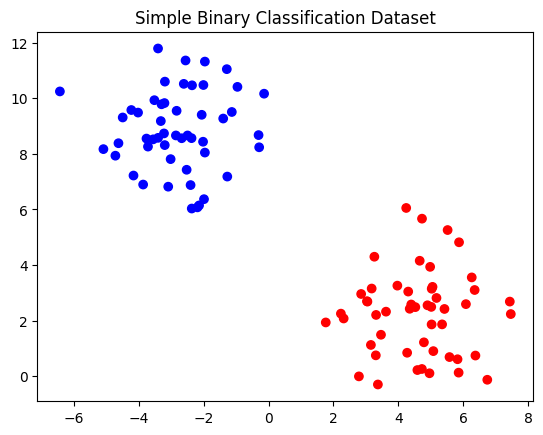

In [41]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#Generated a random 2D binary classification data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

#Convert labels from (0, 1) to (-1, 1) for SVM formulation
y = np.where(y == 0, -1, 1)

#Visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Simple Binary Classification Dataset")
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
svm = ScratchSVMClassifier(kernel='linear')
svm.fit(X_train, y_train)
y_pred_scratch = svm.predict(X_test)


<ipython-input-40-3981338128>:89: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_list.append(float(self.y_sv[i]) - sum_term)


In [44]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print("Scratch SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_scratch, pos_label=1))

print("\nscikit-learn SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Precision:", precision_score(y_test, y_pred_sklearn, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_sklearn, pos_label=1))

Scratch SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

scikit-learn SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# Problem 5 Visualization of Decision Area

Visualise the decision area.

Show support vectors in different colors as in the example below






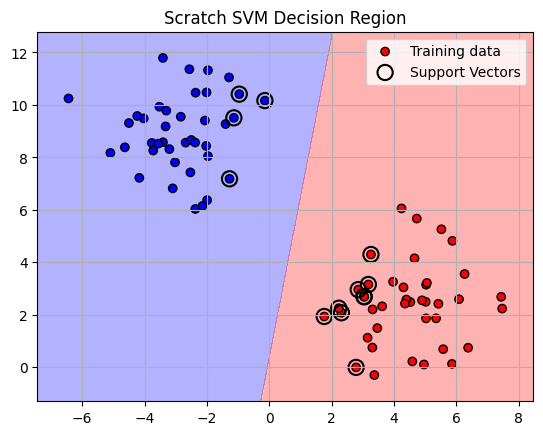

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Creating mesh grid for background prediction
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

#Prediction on the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm.predict(grid).reshape(xx.shape)

#Plot the decision area
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'red'], alpha=0.3)

#Plot training points (blue for -1, red for +1)
colors = ['blue' if label == -1 else 'red' for label in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolors='k', label='Training data')

#Highlight support vectors
plt.scatter(svm.X_sv[:, 0], svm.X_sv[:, 1], s=120, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')

#Plot aesthetics
plt.title("Scratch SVM Decision Region")
plt.legend()
plt.grid(True)
plt.show()


# Problem 6 (Advance task) Creation of polynomial kernel function

The first implementation I created used a linear kernel. Let’s also switch to the polynomial kernel.

“Linear kernel formula”

K​ ​(an unknown​ ​I,​ ​an unknown​ ​J)​ ​=​ ​an unknown​ ​t​ ​I​ ​an unknown​ ​JK(xi,xj)=xiTxj

“Polynomial kernel formula”

K​ ​(an unknown​ ​I,​ ​an unknown​ ​J)​ ​=​ ​(gamma​ ​an unknown​ ​t​ ​I​ ​an unknown​ ​J​ ​+​ ​theta​ ​0)​ ​dK(xi,xj)=(γxiTxj+θ0)d

$\gamma$, $\theta_0$, $d$ are hyperparameters.




In [47]:
#Linear kernel
svm_linear = ScratchSVMClassifier(num_iter=1000, lr=0.001, kernel='linear')

#Polynomial kernel with y = 1, θ0 = 1, d = 2
svm_poly = ScratchSVMClassifier(num_iter=1000, lr=0.001,
                                kernel='polynomial',
                                gamma=1, coef0=1, degree=2)


In [51]:
#Train first
svm_poly.fit(X_train, y_train)

#Now predict on grid points for plotting
Z = svm_poly.predict(grid_points)


<ipython-input-40-3981338128>:89: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_list.append(float(self.y_sv[i]) - sum_term)


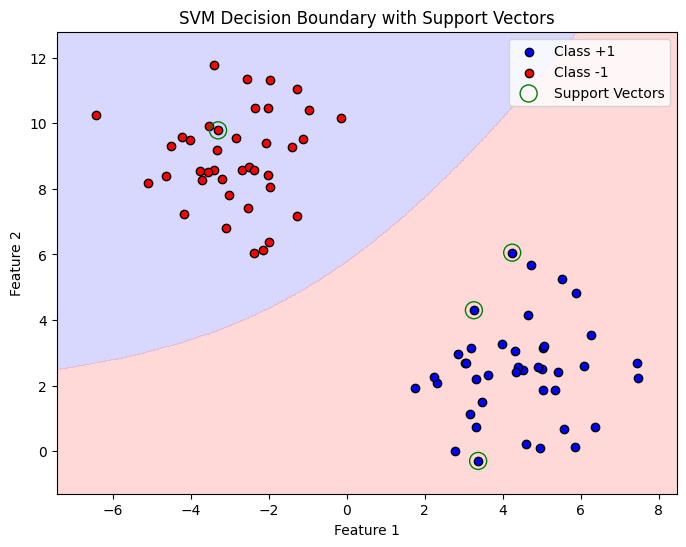

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):

#Creatiing a mesh grid over the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

#Flattening grid to pass into predict
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))

#Plot decision boundary by contouring predicted classes
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(-1, 1, 3), cmap=plt.cm.bwr)

#Plot training points, color by class
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class +1', edgecolors='k')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Class -1', edgecolors='k')

#Plot support vectors with bigger markers
    sv = model.index_support_vectors
    plt.scatter(X[sv, 0], X[sv, 1], s=150, facecolors='none', edgecolors='green', label='Support Vectors')

    plt.legend()
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(svm_poly, X_train, y_train)